(50, 50, 3)
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [2 2 2 ..., 3 3 3]
 [2 2 2 ..., 3 3 3]
 [2 2 2 ..., 3 3 3]]
(50, 50)
0.00986790657043457
labels [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [2 2 2 ..., 3 3 3]
 [2 2 2 ..., 3 3 3]
 [2 2 2 ..., 3 3 3]]


/home/yy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/yy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


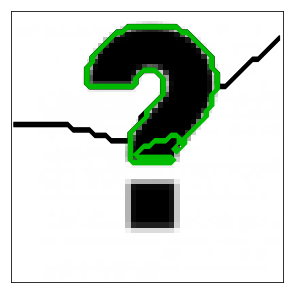

In [10]:
import numpy as np
import scipy.misc
import scipy as sp
import matplotlib.pyplot as plt
import time

N_REGIONS = 2

def km_segmentation(image, n_segments=N_REGIONS, ratio=50, max_iter=100):                       
    # initialize on grid:                                                                 
    height, width = image.shape[:2]                                                       
    # approximate grid size for desired n_segments                                        
    step = np.sqrt(height * width / n_segments)                                           
    grid_y, grid_x = np.mgrid[:height, :width]                                            
    means_y = grid_y[::step, ::step]
    means_x = grid_x[::step, ::step]
                                                                                          
    means_color = image[means_y, means_x, :]
    means = np.dstack([means_y, means_x, means_color]).reshape(-1, 5)                     
    image = np.dstack([grid_y, grid_x, image * ratio])                                    

    nearest_mean = np.zeros((height, width), dtype=np.int)                                
    distance = np.ones((height, width), dtype=np.float) * np.inf                          
    for i in range(max_iter):
        print("iteration %d" % i)                                                         
        nearest_mean_old = nearest_mean.copy()                                            
        # assign pixels to means
        for k, mean in enumerate(means):
            # compute windows:
            y_min = int(max(mean[0] - 2 * step, 0))
            y_max = int(min(mean[0] + 2 * step, height))                                  
            x_min = int(max(mean[1] - 2 * step, 0))                                       
            x_max = int(min(mean[1] + 2 * step, height))                                  
            search_window = image[y_min:y_max + 1, x_min:x_max + 1] 
            dist_mean = np.sum((search_window - mean) ** 2, axis=2)                       
            assign = distance[y_min:y_max + 1, x_min:x_max + 1] > dist_mean               
            nearest_mean[y_min:y_max + 1, x_min:x_max + 1][assign] = k                    
            distance[y_min:y_max + 1, x_min:x_max + 1][assign] = dist_mean[assign]                                                     
        if (nearest_mean == nearest_mean_old).all():                                      
            break
        # recompute means:
        means = [np.bincount(nearest_mean.ravel(), image[:, :, j].ravel())                
                for j in range(5)]
        in_mean = np.bincount(nearest_mean.ravel())
        means = (np.vstack(means) / in_mean).T
    return nearest_mean

#face = scipy.misc.imread('../image/lena.png', mode="L")
#from PIL import Image
#image2 = Image.open('../image/horse001.jpg')
#image2 = image2.resize((100, 100))
#image2.save('../image/resize.jpg')

#face = scipy.misc.imread('../image/lena.png', mode="L")
a=time.time()
face = scipy.misc.imread('../image/question_mark.jpg', mode="RGB")

face = sp.misc.imresize(face, (50, 50)) / 255.

print(face.shape)

ner_mean = km_segmentation(face)
print(ner_mean)
print(ner_mean.shape)
print(time.time()-a)

labels = ner_mean
print("labels", labels)
plt.figure(figsize=(5, 5))
plt.imshow(face, cmap=plt.cm.gray)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
                colors=[plt.cm.spectral(l / float(N_REGIONS))])
plt.xticks(())
plt.yticks(())

plt.show()

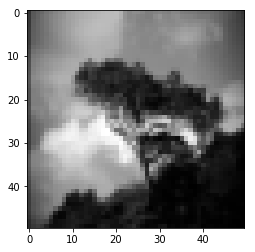

In [11]:
face = scipy.misc.imread('../image/test16.jpg', mode="L")

face = sp.misc.imresize(face, (50, 50)) / 255.

plt.figure()
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

In [12]:
import scipy.linalg.eigh
a=[[0,2,3],[2,0,3],[3,2,0]]

ModuleNotFoundError: No module named 'scipy.linalg.eigh'